# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

# Se importan librerías a utilizar

In [3]:
import itertools
#pip install unidecode
import unidecode

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re

import nltk
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')

#pip install stanza
import stanza
stanza.download("es")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


# Optimizar recursos
import gc

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\peped\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peped\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2021-11-04 18:40:40 INFO: Downloading default packages for language: es (Spanish)...
2021-11-04 18:40:47 INFO: File exists: C:\Users\peped\stanza_resources\es\default.zip.
2021-11-04 18:41:08 INFO: Finished downloading models and saved to C:\Users\peped\stanza_resources.


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Se contarán con 3 archivos en formato JSON con datos estructurados. Uno para entrenamiento (train), uno para testeo (test) y uno de desarrollo (dev).

In [5]:
#Conjunto de entrenamiento
train = pd.read_json(r'C:\Users\peped\Desktop\Curso Data Science Acamica\Sprint 3 - Aplicaciones\Proyecto 3 NLP\dataset_es_test.json', lines=True)
train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


In [6]:
#Conjunto de testeo
test = pd.read_json(r'C:\Users\peped\Desktop\Curso Data Science Acamica\Sprint 3 - Aplicaciones\Proyecto 3 NLP\dataset_es_train.json', lines=True)
test.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [7]:
#Conjunto de desarrollo
dev = pd.read_json(r'C:\Users\peped\Desktop\Curso Data Science Acamica\Sprint 3 - Aplicaciones\Proyecto 3 NLP\dataset_es_dev.json', lines=True)
dev.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


# Análisis Exploratorio de Datos

Se exploran algunas caracteristicas de los datos:

In [8]:
#Tamaño de los datasets:
print('Dimensión del dataset de entrenamiento:' , train.shape)
print('Dimensión del dataset de testeo:       ' , test.shape)
print('Dimensión del dataset de desarrollo:   ' , dev.shape)

Dimensión del dataset de entrenamiento: (5000, 8)
Dimensión del dataset de testeo:        (200000, 8)
Dimensión del dataset de desarrollo:    (5000, 8)


Se observa que el dataset de entrenamiento es 40 veces más grande que los datasets de testeo y desarrollo; representando así el 95.23% del total de los datos. 
También se evidencia que todos tienen las misma cantidad de columnas y que además, representan las mismas características; incluyendo la variable a predecir `stars`. 

Partiendo de lo anterior, se continua con el análisis exploratorio y el preprocesamiento de los datos con un único dataset que contenga la unión de los 3 datasets dados. 

In [9]:
data=pd.concat([train,test,dev], sort=False).reset_index(drop=True)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


In [10]:
data.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
209995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home
209996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera
209997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy
209998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless
209999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel


In [11]:
#Información general de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         210000 non-null  object
 1   product_id        210000 non-null  object
 2   reviewer_id       210000 non-null  object
 3   stars             210000 non-null  int64 
 4   review_body       210000 non-null  object
 5   review_title      210000 non-null  object
 6   language          210000 non-null  object
 7   product_category  210000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.8+ MB


In [12]:
#Valores Faltantes
data.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

In [13]:
#Cuántos valores únicos hay por columna
print('Cantidad de clases/estrellas:           ', len(data.stars.unique()))
print('Cantidad de categorías de producto:     ', len(data.product_category.unique()))
print('Cantidad de idiomas en los comentarios: ', len(data.language.unique()))
print('% de id de comentarios únicos:          ', len(data.review_id.unique())*100/len(data.review_id.unique()))
print('% de productos únicos:                  ', len(data.product_id.unique())*100/len(data.review_id.unique()))
print('% de usuarios únicos:                   ', len(data.reviewer_id.unique())*100/len(data.review_id.unique()))
print('% de comentarios únicos:                ', len(data.review_body.unique())*100/len(data.review_id.unique()))
print('% de título de comentarios únicos:      ', len(data.review_title.unique())*100/len(data.review_id.unique()))

Cantidad de clases/estrellas:            5
Cantidad de categorías de producto:      30
Cantidad de idiomas en los comentarios:  1
% de id de comentarios únicos:           100.0
% de productos únicos:                   74.50380952380952
% de usuarios únicos:                    89.11428571428571
% de comentarios únicos:                 99.10809523809523
% de título de comentarios únicos:       55.78857142857143


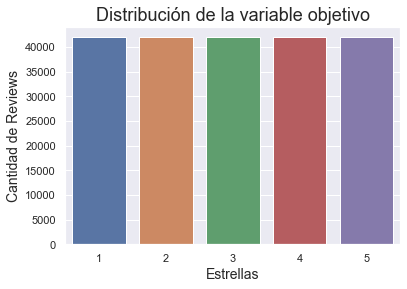

In [14]:
#Cómo están distribuidas las clases (estrellas)
sns.countplot(data=data, x=data.stars)
plt.title('Distribución de la variable objetivo', fontsize=18)
plt.xlabel('Estrellas', fontsize=14)
plt.ylabel('Cantidad de Reviews', fontsize=14)
plt.show()

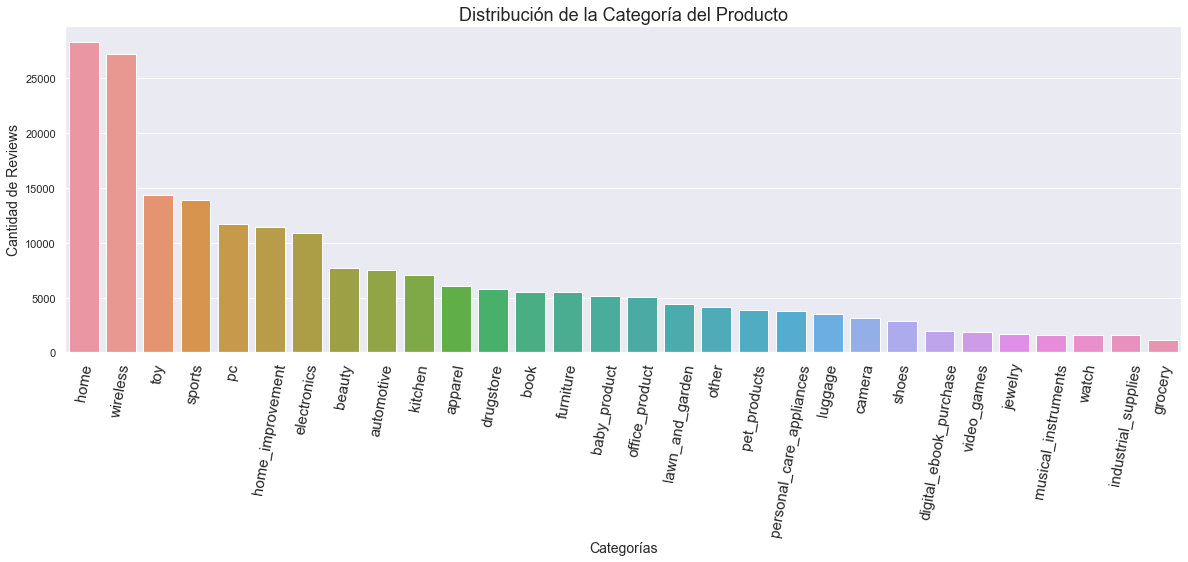

In [15]:
#Distribución de la variable producto_category
plt.subplots(figsize=(20,6))
sns.countplot(data=data, x=data.product_category, order = data.product_category.value_counts().index)
plt.title('Distribución de la Categoría del Producto', fontsize=18)
plt.xlabel('Categorías', fontsize=14)
plt.ylabel('Cantidad de Reviews', fontsize=14)
plt.xticks(rotation=80, fontsize=15)
plt.show()

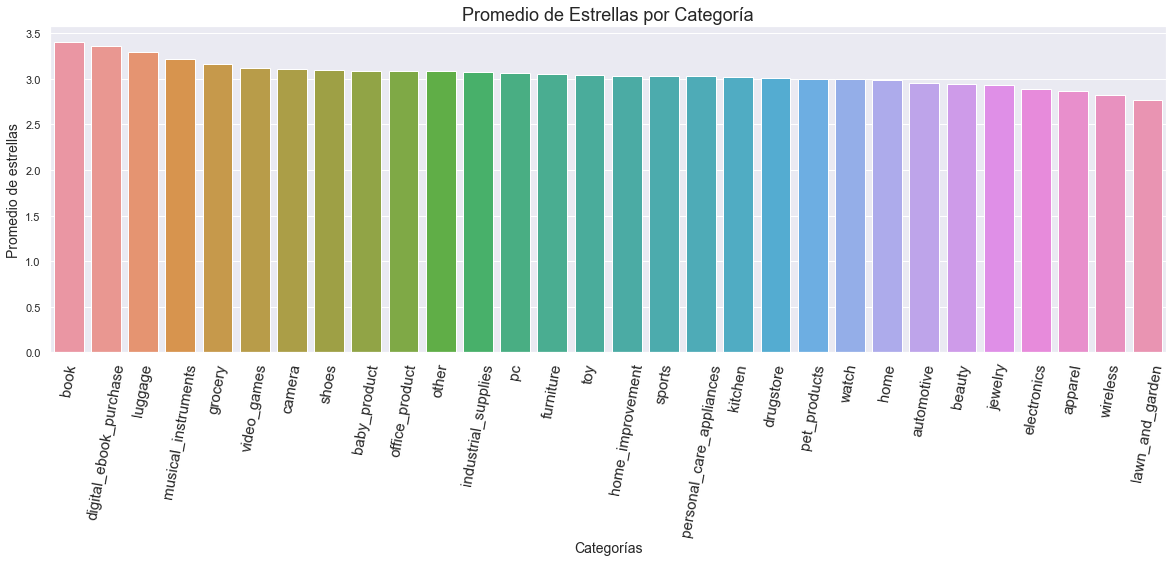

In [16]:
#Promedio de estrellas por categoría 
data_avg = data.stars.groupby([data['product_category']]).mean().reset_index(name='stars_avg')
data_avg = data_avg.sort_values(by='stars_avg', ascending=False).reset_index()
data_avg = data_avg.drop(columns=['index'])

plt.subplots(figsize=(20,6))
sns.barplot(data=data, x=data_avg.product_category, y=data_avg.stars_avg)
plt.title('Promedio de Estrellas por Categoría', fontsize=18)
plt.xlabel('Categorías', fontsize=14)
plt.ylabel('Promedio de estrellas', fontsize=14)
plt.xticks(rotation=80, fontsize=15)
plt.show()

In [17]:
#Algunos comentarios y su calificación
for i in range(0,5):
    index_random = np.random.randint(0,4999)
    review_body = data.review_body.iloc[index_random,]
    stars=data.stars.iloc[index_random,]
    print(index_random, review_body, stars)

1346 Me habian hablado maravillas pero hace mucho ruido y no agarra bien el pelo, no corta. Tienes que pasar muchas veces por la misma zona para dejarlo decente. Un poco decepcionado la verdad. Me imagino que esta marca tendrá muy buenas maquinas pero las de precios superiores. 2
4169 Es muy bonita, y cambia absolutamente la apariencia de la pulsera. Viene con el kit de instalación y es fácil hacerlo. Robusta y ajustable. 5
4491 Los calcetines vienen exactamente como se ven en la foto y hasta mejor calidad, me han gustado mucho el tamaño es perfecto, y el color de los calcetines también viene igual a los de la foto. Me ha gustado tanto que estoy pensando en pedir otras. Buena calidad por buen precio. 5
1395 Me parece un poco caro para lo que es... Compré este porque me gustó el diseño, pensaba que era macizo, pero no. A parte el té se sale (más que en otros infusores más baratos que he tenido) y es un poco desagradable tragar trocitos de hoja de té. Lo he encontrado más barato de otros

In [18]:
#Algunos títulos de comentarios y su calificación
for i in range(0,5):
    index_random = np.random.randint(0,4999)
    review_title = data.review_title.iloc[index_random,]
    stars=data.stars.iloc[index_random,]
    print(index_random, review_title, stars)

4689 Interesante 5
1921 Duracion 1 año 2
2248 Esperando 3
2840 Aceptable 3
743 Esperaba mucho más. 1


### Observaciones:

* El único dato numérico del dataset es la cantidad de estrellas `stars`.
* No hay presencia de datos faltantes.
* Existen 5 clases distribuidas de forma balanceada en el dataset y representan la cantidad de estrellas asignadas al producto.
* Las categorías mejor puntuadas son las de 'book', 'digital_ebook_purchase' y  'luggage'. 
* Hay 30 categorías de productos, donde las más comentadas son 'home', 'wireless' y 'toy'.
* La cantidad de usuarios y productos únicos representan el 89.11% y 74.50% del total de comentarios, respectivamente.
* El 99.10% de los comentarios y el 55.78% de los títulos de comentarios son distintos en todo el corpus.
* Las variables `review_body` y `review_title` contienen información importante para el desarrollo del modelo. 

# Preprocesamiento de los datos

En base a las observaciones mencionadas anteriormente se decide condensar la información más relevante uniendo las columnas `review_body` y `review_title`.

Además se decide eliminar algunas columnas que en principio se consideran poco importantes para el modelo.

In [19]:
data['total_review']=data.review_body + ' ' + data.review_title
dataset=data.drop(columns=['review_id','product_id', 'reviewer_id','review_body','review_title','language','product_category'])
dataset.head()

,stars,total_review
0,1,no me llego el articulo me lo mando por correo...
1,1,"la mensajería horrible, no compro mas amazon s..."
2,1,Estoy muy decepcionado con el vendedor ya que ...
3,1,Mi valoración no es sobre el producto sino sob...
4,1,Pues tenía interés en este libro y probé la ve...


## Normalización

Se procede a realizar algunas transformaciones a los comentarios con el fin de normalizarlos y eliminar posible ruido que afecte el desempeño de los futuros modelos a entrenar. 

Python es sensible a mayúsculas y minúsculas, por lo que palabras como 'la', 'La' o 'LA' se tomarían como elementos diferentes en nuestro corpus. Es por ello que se procederá a pasar todas las palabras del dataset a minúsculas.  

In [20]:
# Se pasan todas la palabras a minúsculas
dataset['total_review'] = dataset['total_review'].str.lower()

Se definen algunas palabras denominadas `stopwords`, que suelen repetirse con mucha frecuencia en el corpus y no aportan valor al modelo. Así, posteriormente se podrán eliminar de los comentarios. Para esto, se utilizará la librería `NLTK` que provee un conjunto de `stopwords` en español. 

A la lista de `stopwords` establecidas por la librería se le añadiran algunas consideradas importantes, por ejemplo, palabras sin acentos o meses del año y, se retirarán otras palabras, por ejemplo 'no' que, unida con otras, pueden agregar información importante.

In [21]:
stopwords = nltk.corpus.stopwords.words('spanish')
#Considermos incluir al listado de stopwords de nltk algunas palabras sin su acento.
stopwords_sin_acentos =  ['si', 'tambien', 'que', 'el', 'mio', 'mia', 'mios', 'mias', 'estas', 'esta', 'estamos', 'estais', 'estan', 'esta', 'estes', 
                         'esteis', 'esten', 'estare', 'estaras', 'estara', 'estareis', 'estaran', 'estaria', 'estarias', 'estariamos', 'estariais', 
                         'estarian', 'estuvieramos', 'estuviesemos', 'habeis',  'hayais','habre', 'habras', 'habra', 'habreis', 'habran',
                         'habria', 'habrias', 'habriamos', 'habriais', 'habrian', 'habia', 'habias', 'habiamos', 'habiais', 'habian', 'hubieramos', 
                         'hubiesemos', 'seais', 'sere', 'seras', 'sera', 'sereis', 'seran', 'seria', 'serias', 'seriamos', 'seriais', 'serian', 
                         'eramos', 'fueramos','fuesemos', 'teneis', 'tengais', 'tendre', 'tendras', 'tendra', 'tendreis', 'tendran', 'tendria', 'tendrias',
                         'tendriamos', 'tendriais', 'tendrian', 'tenia', 'tenias', 'teniamos', 'teniais', 'tenian', 'tuvieramos', 'tuviesemos']

#Consideremos incluir algunas palabras cuya función no aporta al modelo
stopwords_extra = ['vez', 'ademas','dia','dias','mes','meses','año','ano','lunes','martes','miercoles','jueves','viernes','sabado','domingo','ayer','hoy','mañana','manana',
                   'enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre','amazon', 'primero', 'segundo',
                   'tercero','cuarto','quinto', 'sexto','septimo','octavo','noveno','decimo','uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve','diez',
                   'cien','mil']
#Consideremos excluir de las stopwords algunos adverbios de cantidad /afirmación/negación
adv_cantidad = ['muy','mucho','muchos','mas','poco','nada','sin','tanto','ni','no','si']

#Definimos nuevas stopwords
stopwords = stopwords + stopwords_sin_acentos + stopwords_extra
stopwords = [word for word in stopwords if word not in adv_cantidad]
#stopwords

Para continuar con el proceso de normalización de los datos, se procede a definir las siguientes 3 funciones:

`normalizar`: esta función permitirá remover del corpus todos los elementos que se consideran pueden generan ruido en nuestro modelo y que además, no aportarán información útil al modelo basándose en la naturaleza del problema. Entre ellos están:
* Eliminar acentos.
* Eliminar signos de puntuación.
* Eliminar números.
* Eliminar palabras de menos de 2 letras.
* Eliminar stopwords.
* Tokenizar el corpus.

Para este último paso, se utilizá el módulo `tokenize` de la librería NLTK que permite dividir cada instancia del corpus en unidades de texto. En este caso se utiliza la función `word_tokenize` que devuelve una copia del texto divido en tokens=palabras.

In [22]:
def normalizar(reviews, stopwords, list_tokens):
    for i in range(len(reviews)):
        review = reviews[i] #selecciono el comentario
        #Elimino acentos
        review = unidecode.unidecode(str(review)) 
        #Elimino todo lo que no sea letras
        review = re.sub("[^a-zA-Z]"," ",review)
        #Elimino números
        review = re.sub("[0-9]"," ",review)   
        #Tokenizo
        review = nltk.word_tokenize(review)
        #Remuevo StopWords
        review = [palabra for palabra in review if  not palabra in stopwords] 
        #Elimino palabras con menos de 2 letras.
        review = [palabra for palabra in review if len(palabra)>2]
        # Agrego el resultado a la lista
        list_tokens.append(review) 

In [23]:
# Normalizo e incluyo al dataset una columna con los tokens generados
reviews=dataset.total_review.tolist()
reviews_tokens=[]
normalizar(reviews, stopwords, reviews_tokens)
dataset['review_tokens']=reviews_tokens
dataset.iloc[:10]

,stars,total_review,review_tokens
0,1,no me llego el articulo me lo mando por correo...,"[llego, articulo, mando, correos, normal, sin,..."
1,1,"la mensajería horrible, no compro mas amazon s...","[mensajeria, horrible, compro, mas, sigue, sin..."
2,1,estoy muy decepcionado con el vendedor ya que ...,"[muy, decepcionado, vendedor, pedido, llego, t..."
3,1,mi valoración no es sobre el producto sino sob...,"[valoracion, producto, sino, ofreceis, product..."
4,1,pues tenía interés en este libro y probé la ve...,"[pues, interes, libro, probe, version, kindle,..."
5,1,compre este teclado al ver sus buenos comentar...,"[compre, teclado, ver, buenos, comentarios, ap..."
6,1,sigue sin llegar después de meses no compréis ...,"[sigue, sin, llegar, despues, compreis, engano]"
7,1,"no sirve para nada, es malo y se rompe y se de...","[sirve, nada, malo, rompe, despega, sirve, nad..."
8,1,todavía espero que me llegue despues dw una se...,"[todavia, espero, llegue, despues, semana, ret..."
9,1,la peor cámara que he tenido en mis manos. dos...,"[peor, camara, manos, veces, reemplazar, prime..."


`stemming`: se utiliza esta función con el fin de llevar cada palabra del corpus a su palabra raíz. Este proceso se realiza eliminando los sufijos o terminaciones de las palabras basándose en el  [Algoritmo Snowball en español](http://snowball.tartarus.org/algorithms/spanish/stemmer.html). La librería NLTK provee la clase `SnowballStemmer` que funciona bastante bien para encontrar el stem de cada palabra en español.

In [24]:
def stemming(reviews_tokens, reviews_stemm):
    stemmer = SnowballStemmer('spanish')
    for rev in reviews_tokens:
        rev=[stemmer.stem(palabra) for palabra in rev]
        rev = " ".join(rev)
        reviews_stemm.append(rev)

In [25]:
# Stemmatizo e incluyo al dataset una columna con los stems generados
reviews_stemm=[]
stemming(reviews_tokens,reviews_stemm)
dataset['reviews_stemm'] = reviews_stemm
dataset.iloc[:10]

,stars,total_review,review_tokens,reviews_stemm
0,1,no me llego el articulo me lo mando por correo...,"[llego, articulo, mando, correos, normal, sin,...",lleg articul mand corre normal sin seguimient ...
1,1,"la mensajería horrible, no compro mas amazon s...","[mensajeria, horrible, compro, mas, sigue, sin...",mensajeri horribl compr mas sig sin cumpl entreg
2,1,estoy muy decepcionado con el vendedor ya que ...,"[muy, decepcionado, vendedor, pedido, llego, t...",muy decepcion vendedor ped lleg tiemp cumpli p...
3,1,mi valoración no es sobre el producto sino sob...,"[valoracion, producto, sino, ofreceis, product...",valoracion product sin ofreceis product eur tr...
4,1,pues tenía interés en este libro y probé la ve...,"[pues, interes, libro, probe, version, kindle,...",pues inter libr prob version kindl abre port n...
5,1,compre este teclado al ver sus buenos comentar...,"[compre, teclado, ver, buenos, comentarios, ap...",compr tecl ver buen comentari aparient lleg ca...
6,1,sigue sin llegar después de meses no compréis ...,"[sigue, sin, llegar, despues, compreis, engano]",sig sin lleg despu compreis engan
7,1,"no sirve para nada, es malo y se rompe y se de...","[sirve, nada, malo, rompe, despega, sirve, nad...",sirv nad mal romp despeg sirv nad pesim product
8,1,todavía espero que me llegue despues dw una se...,"[todavia, espero, llegue, despues, semana, ret...",todavi esper lleg despu seman retras pesim tra...
9,1,la peor cámara que he tenido en mis manos. dos...,"[peor, camara, manos, veces, reemplazar, prime...",peor cam man vec reemplaz prim uso final mit a...


En este punto, se halla con un dataset limpio para modelar. Sin embargo, existe otro método de normalización de las palabras relacionado con la función que cumple dicha palabra en el texto. Ésto es, si la palabra es un verbo, un adjetivo, un adverbio, etc.

Primero, se define una función que permita unir los tokens con espacios. Esto será útil más adelante.

In [26]:
def unir_palabras(fila):
    lista = fila['review_tokens']
    palabras_unidas = ( " ".join(lista))
    return palabras_unidas

In [27]:
dataset['review_tokens_unidos']= dataset.apply(unir_palabras, axis=1)

Se defines la tercera función de normalización:

`lemmatizar`: permitirá encontrar la raíz de la palabra en función al rol que cumple ésta en el texto. Para esto, en vez de continuar con la librería NLTK, utilizaremos la librería [Stanza](https://stanfordnlp.github.io/stanza/) que contiene lemmatizador en español y es bastante eficiente. 

Es importante resaltar en este punto, que el proceso de lemmatización para los 210.000 comentarios conlleva un tiempo de ejecución prolongado.

In [28]:
# Lemmatizo e incluyo al dataset una columna con los lemmas generados
def lemmatizar(review_tokens_unidos, review_lemma):
    nlp = stanza.Pipeline(lang='es', processors='tokenize,mwt,pos,lemma')
    for rev in range(len(review_tokens_unidos)):
        doc=nlp(review_tokens_unidos[rev])
        rev_lemma=[palabra.lemma for oracion in doc.sentences for palabra in oracion.words]
        rev_lemma=" ".join(rev_lemma)
        review_lemma.append(rev_lemma)

In [ ]:
review_tokens_unidos=dataset.review_tokens_unidos.tolist()
reviews_lemma=[]
lemmatizar(review_tokens_unidos,reviews_lemma)

In [ ]:
dataset['reviews_lemma'] = reviews_lemma
dataset.iloc[:10]

Debido a que los tiempos de ejecución de estos procesos de normalización son bastante largos, se procede a guardar el dataset normalizado para su uso posterior.

In [ ]:
dataset.to_csv('dataset_clean.csv')

In [ ]:
gc.collect()

## Visualización de frecuencia de palabras:

Se carga el dataset normalizado y se decide continuar en primera instancia el conjunto de palabras lemmatizadas:

In [29]:
dataset_clean = pd.read_csv(r'C:\Users\peped\Desktop\Curso Data Science Acamica\Sprint 3 - Aplicaciones\Proyecto 3 NLP\dataset_clean.csv')
dataset_lemma= dataset_clean.drop(columns=['total_review', 'review_tokens', 'reviews_stemm','review_tokens_unidos'])

Se crea una lista para cada clase de estrellas con el fin de observar cuáles son las palabras más frecuentes según la calificación asignada a cada comentario.

In [30]:
una=dataset_lemma[dataset_lemma.stars==1].reviews_lemma.tolist()
dos=dataset_lemma[dataset_lemma.stars==2].reviews_lemma.tolist()
tres=dataset_lemma[dataset_lemma.stars==3].reviews_lemma.tolist()
cuatro=dataset_lemma[dataset_lemma.stars==4].reviews_lemma.tolist()
cinco=dataset_lemma[dataset_lemma.stars==5].reviews_lemma.tolist()

Se define una función que permita visualizar la frecuencia de las palabras en cada clase y se realiza su visualización. 

In [31]:
def frecuencias(estrellas,N):
    #Calculo las frecuencias
    freq=nltk.FreqDist(palabra for palabra in estrellas)
    
    #Paso a un DF ordenando las frecuencias de forma ascendente
    df = pd.DataFrame(list(freq.items()), columns = ["Palabra","Frecuencia"]) 
    df = df.sort_values('Frecuencia', ascending=False)
    df.reset_index(drop = True, inplace=True)
    
    
    #Grafico las primeras N palabras más frecuentes
    plt.subplots(figsize=(20,6))
    sns.barplot(data=df, x=df.Palabra.iloc[:N], y=df.Frecuencia.iloc[:N])
    plt.title('Frecuencia de palabras', fontsize=18)
    plt.xlabel('Palabras', fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.xticks(rotation=80, fontsize=15)
    plt.show()    

- **Una estrella:**

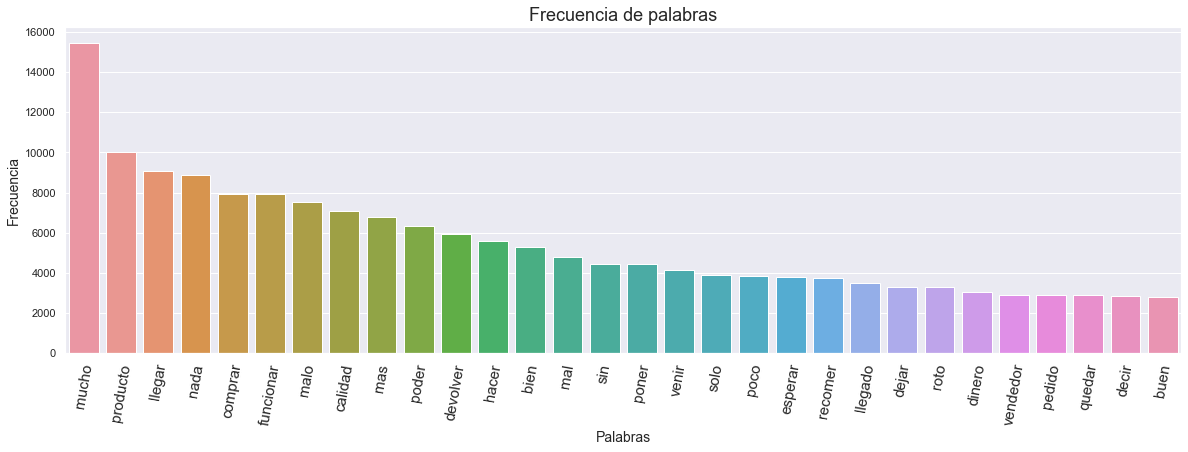

In [32]:
una_tokens=[]
normalizar(una, stopwords, una_tokens)
una_tokens=list(itertools.chain(*una_tokens)) #convierte una lista de listas en una única lista.
frecuencias(una_tokens, N=30)

- **Dos estrellas:**

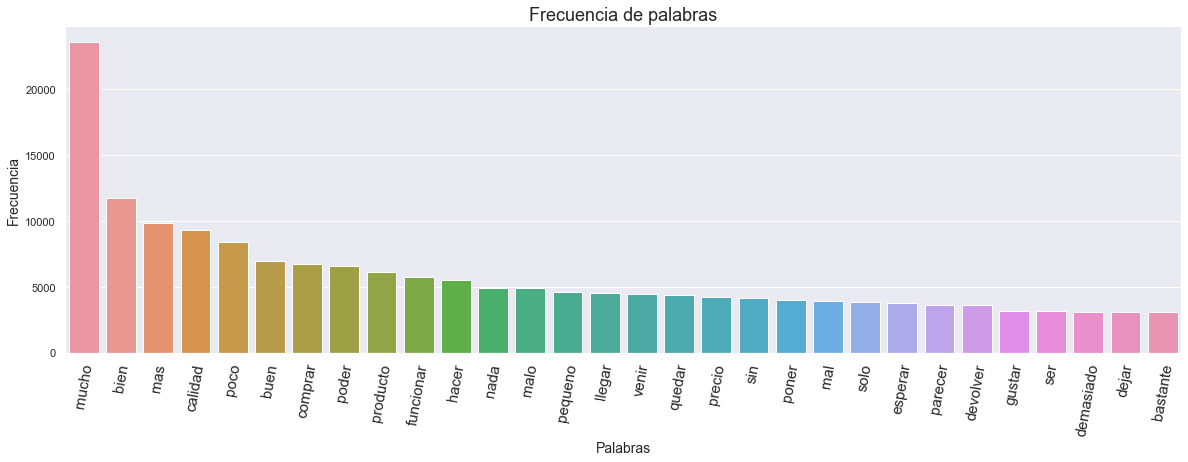

In [33]:
dos_tokens=[]
normalizar(dos, stopwords, dos_tokens)
dos_tokens=list(itertools.chain(*dos_tokens)) #convierte una lista de listas en una única lista.
frecuencias(dos_tokens, N=30)

- **Tres estrellas:**

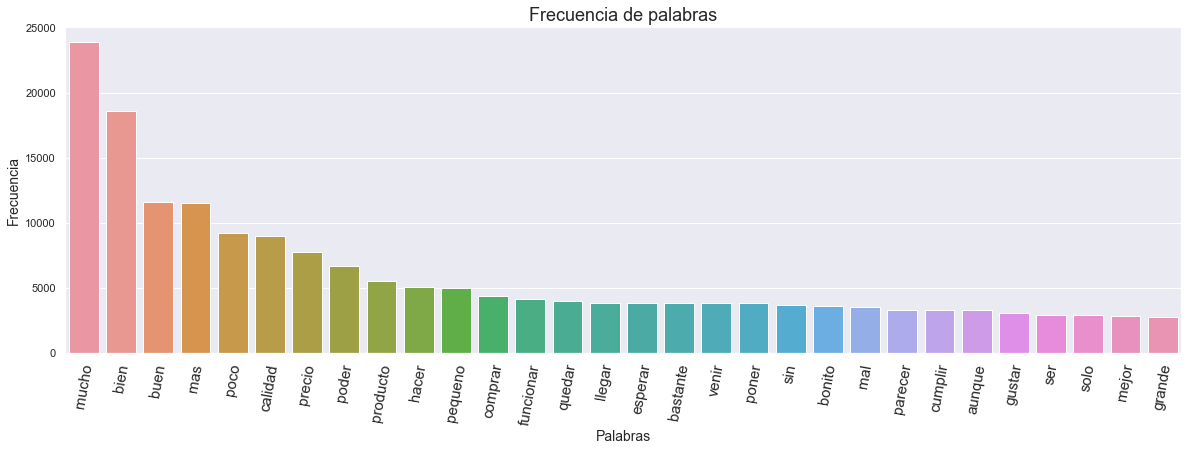

In [34]:
tres_tokens=[]
normalizar(tres, stopwords, tres_tokens)
tres_tokens=list(itertools.chain(*tres_tokens)) #convierte una lista de listas en una única lista.
frecuencias(tres_tokens, N=30)

- **Cuatro estrellas:**

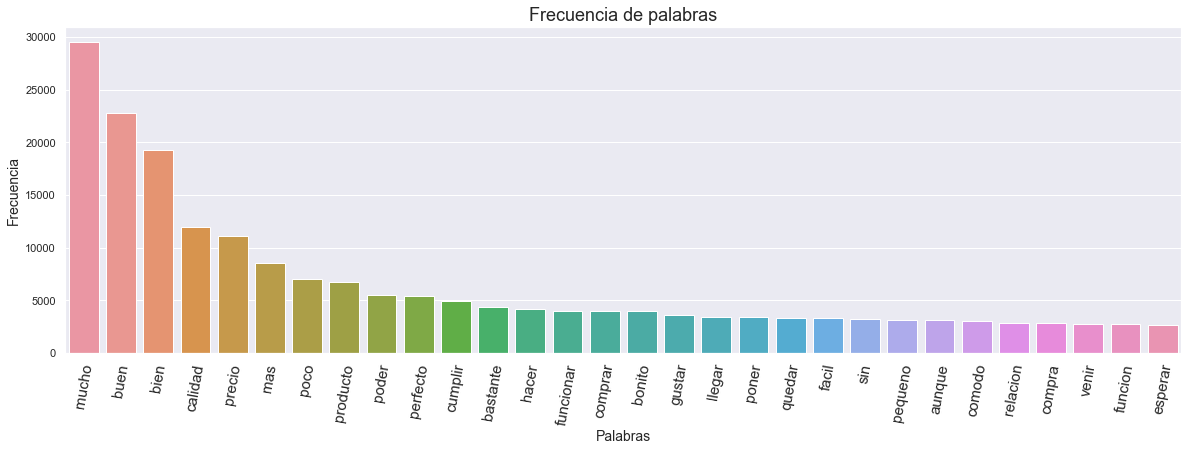

In [35]:
cuatro_tokens=[]
normalizar(cuatro, stopwords, cuatro_tokens)
cuatro_tokens=list(itertools.chain(*cuatro_tokens)) #convierte una lista de listas en una única lista.
frecuencias(cuatro_tokens, N=30)

- **Cinco estrellas:**

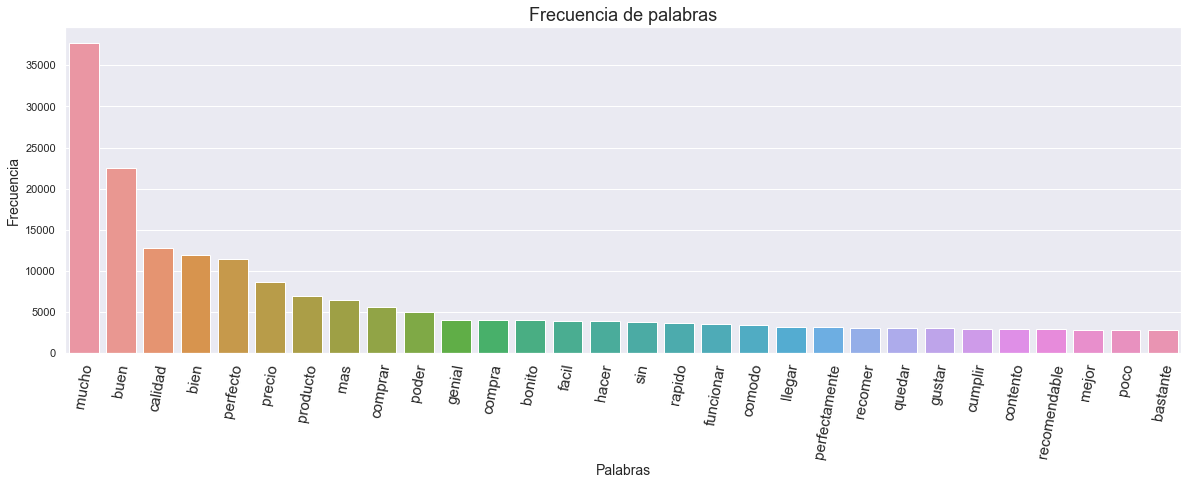

In [36]:
cinco_tokens=[]
normalizar(cinco, stopwords, cinco_tokens)
cinco_tokens=list(itertools.chain(*cinco_tokens)) #convierte una lista de listas en una única lista.
frecuencias(cinco_tokens, N=30)

Observaciones:

* Se observa que las palabras "mucho", "bien", "buen", "mas" y "calidad" son las más frecuentes en todas la calificaciones, esto podría traer problemas en los modelos.
* Existen palabras claves en cada categoría que pueden ayudar con la clasificación de los comentarios como son: "malo", "poco" , "regular" o "perfecto" , "genial", "contento". 
* Unir adverbios de cantidad con adjetivos calificativos puede agregar mayor información al modelo. Por ejemplo: 'mala calidad' o 'muy bonito', entre otros.

# Modelos Machine Learning

Es importante resaltar que se está trabajando con un problema de clasificación. Además, corresponde a un método de aprendizaje supervisado, donde se debe entrenar un modelo que permita predecir la cantidad de estrellas equivalentes a un comentario dado sobre un producto.

Para implementar modelos de Machine Learning se ha trabajado anteriormente en este notebook con el preprocesamiento de los datos. Se normalizó el texto eliminado elementos que pudiesen generar sesgo, se identificaron los tokens del corpus, se llevaron las palabras a su raíz con los procesos de stemming y lemmatización.

En lo que sigue, se transformarán los datos a entidades numéricas para que los modelos de Machine Learning los puedan procesar. Para esto, se procederá a utilziar la técnica TFIDF (Term Frecuency & Inverse Data Frecuency) que permite convertir una colección de datos en bruto a una matríz de atributos numéricos. Además, permite medir no sólo cuánto aparece una palabra en un comentario, sino también qué tan frecuente es esa palabra en todo nuestro corpus y les asigna un peso. 

Se utilizará la clase `TfidfVectorizer` de la librería Sklearn. La fórmula que usa para calcular la matríz es:

$$ TFIDF = TF * IDF $$

TF = número de veces que una palabra aparece en un comentario / número total de palabras en todo el corpus.

IDF = logaritmo del número de comentarios en el corpus entre el número de comentarios en los que ha aparecido la palabra. 
 
**'Los términos raros son más informativos que los términos frecuentes'**

## Modelos 

Se entrenarán algunos modelos en su versión clasificadora y se medirán sus desempeños. Se tiene en cuenta que la distribución de las clases está balanceada y además, se considerará de ser necesario, ajustar el modelo para la clasificación de múltiples clases. 

Se comenzará con un árbol de decisión con una profundidad baja como modelo benchmark y y luego, se procederá con los modelos LinearSVC, Random Forest, Multinomial NB, Regresión Logística y XGBoost. Se escogerán los dos mejores modelos para luego optimizar sus hiperparámetros. 

## Métricas 

Para justificar el desempeño de los modelos, se elije como métrica el `accuracy` ya que se cuenta con un dataset cuyas clases están perfectamente balanceadas. Entonces, se calcula del total de los comentarios cuántos han sido clasificados en la clase correcta, y esto bastará para saber si el modelo está clasificando bien o no. Se utilizará la clase `accuracy_score` de la librería Sklearn para calcularlo y, para visualizar la clasificación por estrellas se utilizará la clase `confusion_matrix`. 

In [37]:
def confusion(y_test,y_pred):
    names=['Una','Dos','Tres','Cuatro','Cinco']
    cm=confusion_matrix(y_test,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

### Modelo Benchmark: Árbol de Decisión

Se considera tomar como modelo benchmark un árbol de decisión con sus parámetros definidos por default excepto la profundidad máxima que se la definirá como `max_depth = 10`. Lo primero que se hará será vectorizar nuestros datos usando la clase `TfidfVectorizer`. Se utilizarán sus parámetros por default menos la cantidad máxima de features que la se establecerán como `max_features = 1000`.

In [38]:
# Vectorización
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(dataset_clean['reviews_lemma']).toarray()
y = dataset_clean.stars
print(X.shape)
print(y.shape)

(210000, 1000)
(210000,)


Se generan los conjuntos de entrenamiento y testeo, con una proporción de los datos del 70% y 30% respectivamente. Se agrega el parámetro `stratify` para asegurar un equilibrio en la distribución de las clases, en este caso la cantidad de estrellas. 

In [39]:
# Train/Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify=dataset_clean.stars,random_state=42)

In [40]:
#Modelo
tree = DecisionTreeClassifier(max_depth=10, random_state=42)
tree.fit(X_train, y_train)
#Genero predicciones
y_pred = tree.predict(X_test)

0.3813968253968254


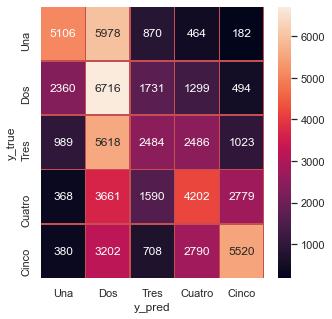

In [41]:
#Evaluo el modelo
print(accuracy_score(y_test, y_pred))
confusion_tree = confusion(y_test,y_pred)
#acc_tree
#confusion_tree

Observaciones:

* El desempeño del modelo es bastante bajo, 38.07%.
* La efectividad del modelo parece estar afectada por la mala clasificación de las clases correspondientes a 3 y 4 estrellas. 
* En este caso se observa que la clases con mayor cantidad de aciertos son las de 1,2 y 5 estrellas. 
* La clase que peor se clasifica es la de 3 estrellas, lo cual es esperado porque esta calificación suele tener comentarios negativos o positivos sobre los productos.

In [42]:
gc.collect()

22700

### Selección de modelos

Ahora, se entrenarán 5 modelos de clasificación con sus parámetros definidos por default exceptuando el parámetro n_estimators del modelo Random Forest, el cual se definirá como `n_estimator = 5`; los parámetro max_iter y multi_class de la regresión logística, los cuales se definirán como `max_iter = 1000` por la cantidad de instancias que se tienen y `multi_class = 'multinomial'` al tratarse de un problema de múltiples clases. Por último, se define en los casos necesarios una semilla determinada; `random_state = 42`. Dependiendo de su desempeño se eligirán los dos mejores para continuar con la optimización de hiperparámetros.

Es importante resaltar que se continua considerando la cantidad máxima de features igual a 1000, sin embargo, más adelante se probará variar este parámetro para observar si se pueden obtener mejoras.  

Se define una función que permita observar el desempeño de cada modelo y su clasificación por categoría:

In [43]:
def seleccion_modelo(X_train, X_test, y_train, y_test):
    modelos=[LinearSVC(random_state=42),
            RandomForestClassifier(n_estimators = 5, random_state=42),
            MultinomialNB(),
            LogisticRegression(random_state=42, max_iter=1000, multi_class= 'multinomial'),
            XGBClassifier(random_state=42)]
    nombre_modelo = ['LinearSVC','Random Forest','MultinomialNB','Regresión Logística', 'XGBoost']
    for modelo in modelos:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        print('Modelo:', nombre_modelo[modelos.index(modelo)])
        print('acc :  ', accuracy_score(y_test, y_pred))
        confusion(y_test,y_pred)

Modelo: LinearSVC
acc :   0.5149206349206349


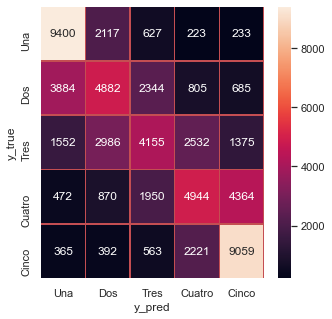

Modelo: Random Forest
acc :   0.4285873015873016


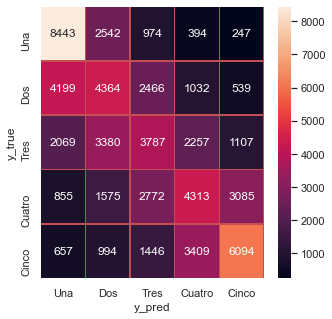

Modelo: MultinomialNB
acc :   0.5006349206349207


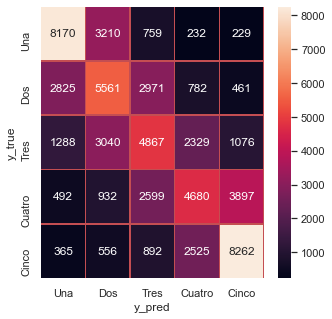

Modelo: Regresión Logística
acc :   0.5221746031746032


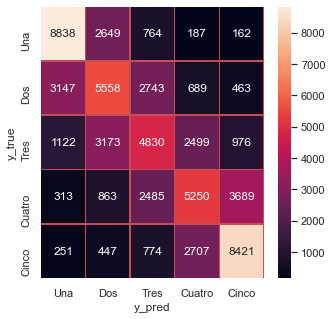

C:\Users\peped\anaconda3\envs\datascience\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:10:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Modelo: XGBoost
acc :   0.5062698412698413


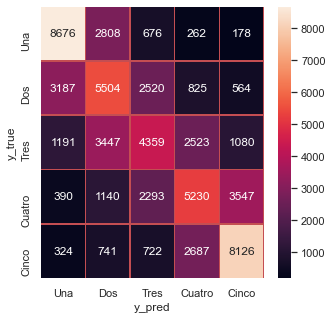

In [44]:
seleccion_modelo(X_train, X_test, y_train, y_test)

In [45]:
gc.collect()

28597

Despúes de entrenar los modelos, se observa que los que presentan mayor efectividad en la clasificación son: LinerarSVC y Regresión Logística. Por lo que se continuará trabajando con estos dos.

Se destaca también que todos los modelos tienden a clasificar mejor las clases extremo; las correspondientes a 1 y 5 estrellas. Esto parece ser natural ya que son los comentarios que suelen tener esta calificación tienen palabras relacionadas con información negativa o positiva sobre el producto. 

## Optimización de hiperparámetros

Se variará la cantidad máxima de features a generar por el vectorizador TFIDF. Además, en este punto, se considera producir n-gramas que corresponden a la unión de las palabras más correlacionadas en cada categoría. 

* `max_features`: define la cantidad máxima de features que se desean generar, en este caso, se variará este parametro con los valores [1000, 2000, 4000, 6000, 8000, 10000].
* `ngram_range`: determina la cantidad de n-gramas que se desean generar. se define como (1,2) para obtener unigramas y bigramas más correlacionados en el corpus.

Entonces, se verá el desempeño de los modelos variando la cantidad máxima de features e incluyendo bigramas. Se define una función que permita encontrar el valor óptimo de `max_features` para cada modelo:

In [46]:
def tfidf_optimo(max_features, modelo):
    lista_acc_train = []    
    lista_acc_test = [] 

    for i in max_features:    
        #Generamos el vectorizador
        vectorizer = TfidfVectorizer(max_features = i, ngram_range = (1,2))
        #Vectorizamos los datos
        X = vectorizer.fit_transform(dataset_clean['reviews_lemma']).toarray()
        y = dataset_clean.stars
        #Genero los conjuntos train/test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=dataset_clean.stars, random_state=42) 
        #Defino el modelo 
        clf = modelo
        clf.fit(X_train, y_train) 
        #Calculo predicciones
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        acc_train = accuracy_score(y_train, y_pred_train) 
        acc_test = accuracy_score(y_test, y_pred_test)
        # Agregar acc a la lista
        lista_acc_train.append(acc_train)
        lista_acc_test.append(acc_test)

    print('Accuracy Train: ', lista_acc_train)    
    print('Accuracy Test: ', lista_acc_test)        

    #Grafico
    plt.figure(figsize = (10,8))
    plt.plot(max_features,lista_acc_train,'o-',label='train', color = 'red')
    plt.plot(max_features,lista_acc_test,'o-',label='test', color = 'purple')
    plt.ylim(0.45, 0.65)
    plt.legend()
    plt.xlabel('Número de features')
    plt.ylabel('Accuracy')
    plt.show()

In [47]:
max_features = [500,1000,2000,5000]
svc = LinearSVC(random_state=42)
tfidf_optimo(max_features, svc)

MemoryError: Unable to allocate 5.48 GiB for an array with shape (147000, 5000) and data type float64

In [48]:
gc.collect()

15

In [ ]:
max_features = [500,1000,2000,5000]
lr = LogisticRegression(random_state=42, max_iter=1000, multi_class= 'multinomial')
tfidf_optimo(max_features, lr)

In [ ]:
gc.collect()

Observaciones:

* Se ha variado la cantidad máxima de features entre 500 y 5000, con la generación de unigramas y bigramas.
* Se observa el comportamiento del desempeño de los modelos para los conjuntos de train y test, con la intención de escoger el valor máximo features que mantenga un comportamiento similar en ambos conjuntos. 
* Para ambos modelos se observa que el valor óptimo de features generados es 1000.
* Para valores menores a 1000 se observa el peor desempeño de los modelos.
* Para valores mayores a 1000 se observa mejor desempeño para conjunto de train mientras que para el conjunto de test se mantiene constante en ambos modelos.
* La inclusión de unigramas y bigramas mejora la exactitud del problema.

### Unigramas y bigramas generados.

Se utiliza ahora la clase `chi2` del modulo `feature_selection` de Sklearn la cual ayudará a encontrar los términos (unigramas y bigramas) más relevantes producidos por el vectorizador utilizado, calculando la correlación entre los features. Para esto, se define la siguiente función:

In [ ]:
def correlacion(N , X, y, vectorizer):
    for star in range(1,6):
        x_tfidf_chi2 = chi2(X, y== star)
        indices = np.argsort(x_tfidf_chi2[0])
        x_tfidf_names = np.array(vectorizer.get_feature_names())[indices]
        unigrams = [v for v in x_tfidf_names if len(v.split(' ')) == 1]
        bigrams = [v for v in x_tfidf_names if len(v.split(' ')) == 2]
        print("Número de estrellas'{}':".format(star))
        print("  . Unigramas más correlacionados:\n       . {}".format('\n       . '.join(unigrams[-N:])))
        print("  . Bigramas más correlacionados:\n       . {}".format('\n       . '.join(bigrams[-N:])))

In [ ]:
N=3
vectorizer = TfidfVectorizer(max_features= 1000, ngram_range = (1,2))
X = vectorizer.fit_transform(dataset_clean['reviews_lemma']).toarray()
y = dataset_clean.stars
correlacion(N, X, y, vectorizer)

In [ ]:
gc.collect()

Observaciones:

* Como se observaba, los unigramas y bigramas más correlacionados con las categorías de 1 y 5 estrellas representa de manera explícita la relación entre la cantidad de estrellas asignadas y su comentario.
* Los unigramas y bigramas generados para las estrellas 2,3 y 4 presentan características similares. Siendo ésto uno de los motivos por los cuales es más difícil clasificar los comentarios para estás clases.

## Optimización de Hiperparámetros

Teniendo ya el valor óptimo de la cantidad máxima de features para cada modelo, se procede a optimizar los hiperparámetros de cada uno. Para ésto, se hará uso de la funcionalidad `GridSearchCV` de Sklearn, la cual permite hacer variaciones de los hiperparámetros del modelo y además, incluye la técnica de Validación Cruzada que ayudará a obtener independencia de la partición de nuestros datos.

Las variables X y y a utilizar son las generadas en el bloque anterior.

Los hiperparámetros que se considera variar para ambos modelos son:

`penalty`: el cual está asociado a la norma de penalización usada en el modelo. Podrá ser l1 para considerar regularización de Lasso o l2 para la regularización de Ridge, de esta manera producir el modelo más simple y que mejor generalicen.

`C`: siendo un parámetro que también regulariza el modeo, con la intención de equilibrar la obtención de lograr un error bajo para el conjunto de entrenamiento y minimizar el valor de los pesos asignados. 

Para la regresión logística se considera también:

`max_iter`: representa el número máximo de iteraciones para que el modelo converja a un resultado.

Se define entonces los conjuntos de train y test:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=dataset_clean.stars, random_state=42) 

Se entrenan los modelos con sus respectivas grillas de parámetros:

In [ ]:
svc = LinearSVC(random_state=42)
# Grilla de parámetros
param_grid = {'penalty': ['l1', 'l2'],
              'C': [1,2,4,6,8,10],
              }
# GridSearch
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Mejores parametros: "+str(grid_search.best_params_))
print("Mejor Score: "+str(grid_search.best_score_)+'\n')

In [ ]:
gc.collect()

In [ ]:
lr = LogisticRegression(random_state=42, multi_class = 'multinomial')
# Grilla de parámetros
param_grid = {'penalty': ['l1', 'l2'],
              'max_iter': [1000, 1500],
              'C': [1,2,4,6,8,10]              
              }
# GridSearch
grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Mejores parametros: "+str(grid_search.best_params_))
print("Mejor Score: "+str(grid_search.best_score_)+'\n')

In [ ]:
gc.collect()

### Comparación de resultados

Con los parámetros encontrados, se entrenará nuevamente los modelos y se comparará con el modelo benchmark.

In [ ]:
#Modelo LinearSVC
svc = LinearSVC(C= 4, penalty= 'l2', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(accuracy_score(y_test, y_pred))
confusion(y_test,y_pred)

In [ ]:
gc.collect()

In [ ]:
# Modelo Regresión Logística
lr = LogisticRegression(C= 1, max_iter= 1000, multi_class= 'multinomial', penalty= 'l2', random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test, y_pred))
confusion(y_test,y_pred)

In [ ]:
gc.collect()

In [ ]:
acc= [0.377, 0.521, 0.527, ]
columnas = ['Accuracy'] 
filas = ['Benchmark', 'LinearSVC', 'Regresión Logística'] 

comparacion = pd.DataFrame(acc, columns=columnas, index=filas)
comparacion.head()

In [ ]:
gc.collect()

**Se encuentra que el modelo que mejor clasifica es el de regresión logística. Se observa una mejora importante entre el modelo benchmark y los modelos optimizados.**

# Conclusiones

Después de un exhaustivo proceso de transformación de datos, evaluación de modelos y optimización de hiperparámetros, se han encontrado dos modelos que presentan un desempeño general de aproximadamente el 50% de efectividad para la clasificación de comentarios sobre un producto vendido en amazon. Si bien, parece ser un performance bajo respecto al deseado, se encontraron una serie de características a destacar:

* El modelo que mejor predice la calificación de un comentario por estrellas es el de la Regresión Logística en su modalidad de múltiples clases.
* Las clases mejor predichas por el modelo son las correspondientes a 1 y 5 estrellas. Esto se debe al uso de palabras definidas como negativas o positivas que utiliza el usuario al escribir el comentario.
* Las clases 2, 3 y 4 son las clases que le cuesta más al modelo predecir. Esto esta relacionado a la subjetividad con la que usuario puede escribir y calificar un producto. Por lo que quizás use palabras positivas y negativas en un comentario de, por ejemplo, 3 estrellas y esto produce una confusión al momento de clasificar. 
* La optimización del método de vectorización agrega valor a los resultados obtenidos por los modelos, en especial la inclusión  de bigramas.
* La optimización de hiperparámetros de los modelos también permite encontrar mejores resultados.

Para probar en futuras iteraciones:

* Utilizar en vez de las palabras lemmatizadas, las generadas a través del proceso de stemming.
* Implementar modelos de Deep Learning para optener mejores resultados. Implementar redes neuronales.
* Utilizar otro tipo de vectorizador, como por ejemplo, Word2Vec.
* Existen muchos y mejores recursos para normalizar texto en inglés. Quizás implementar un buen traductor al corpus y modelarlo en inglés genere mejores resultados.

Ahora, ¿valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, las clasifique.

## Modelo Binario

Se utilizará el dataset cargado, limpio y que además contiene los comentarios y sus títulos unidos.

In [ ]:
dataset_lemma.head()

Se ordena el dataset de forma ascendente según el número de estrellas, siendo útil para separar el dataset en dos categorías.

In [ ]:
dataset_lemma = dataset_lemma.sort_values('stars')

Se le asigna al dataset  una nueva etiqueta con dos categorías, una positiva que estará compuesta por los comentarios calificados con 3,4, y 5 estrellas. Y otra categoría negativa que contendrá los comentarios calificados con 1 y 2 estrellas.

In [ ]:
def set_values(row, value):
    return value[row]
   
map_dictionary ={1 : "Neg", 2 :"Neg", 3 : "Pos", 4 :"Pos", 5:"Pos"} 
   
dataset_lemma['etiqueta'] = dataset_lemma['stars'].apply(set_values, args =(map_dictionary, )) 
dataset_lemma.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset_lemma.reset_index(drop=True, inplace=True)
dataset_lemma.head()

In [ ]:
#Cómo están distribuidas las etiquetas generadas
sns.countplot(data=dataset_lemma, x=dataset_lemma.etiqueta)
plt.title('Distribución de la variable objetivo', fontsize=18)
plt.xlabel('Etiqueta', fontsize=14)
plt.ylabel('Cantidad de Reviews', fontsize=14)
plt.show()

In [ ]:
print(pd.value_counts(dataset_lemma['etiqueta'], sort = True))

En este punto, se halla un pequeño problema y es que las nuevas clases generadas presentan una distribución desbalanceada, es decir, se cuentan con más comentarios positivos que negativos y esto podría afectar al modelo en su proceso de clasificación. Entonces, para solucionar ésto y porque el modelo de Regresión Logística lo permite, se ajustará el parámetro `class_weight` igual a 'balanced' el cual asignará un peso a cada clase y permitirá tener una muestra equilibrada. 

Primero, se entrenará un modelo con las clases desbalanceadas y después con el parámetro ajustado para observar las diferencias en los desempeños de los modelos

In [ ]:
# Vectorizamos
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(dataset_lemma['reviews_lemma']).toarray()
y = dataset_lemma.etiqueta

In [ ]:
# Generamos el conjunto de train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify=dataset_lemma.etiqueta,random_state=42)

In [ ]:
# Entrenamos y evaluamos el modelo
lr = LogisticRegression(max_iter= 1000, multi_class= 'multinomial', random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test, y_pred))
names=['Neg','Pos']
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(2,2))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [ ]:
gc.collect()

Se observa que, en comparación al modelo con las 5 clases de calificación mejora notablemente la efectividad del modelo de un 0.527 a un 0.824. Sin embargo, las clases en este punto están desbalanceadas. Ahora, se procede a optimizar la cantidad de features generados por el vectorizador tfidf:

In [ ]:
max_features = [500,1000,2000,5000]
lista_acc_train = []    
lista_acc_test = [] 

for i in max_features:    
    #Generamos el vectorizador
    vectorizer = TfidfVectorizer(max_features = i, ngram_range = (1,2))
    #Vectorizamos los datos
    X = vectorizer.fit_transform(dataset_lemma['reviews_lemma']).toarray()
    y = dataset_lemma.etiqueta
    #Genero los conjuntos train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=dataset_lemma.etiqueta, random_state=42) 
    #Defino el modelo 
    lr = LogisticRegression(random_state=42, max_iter=1000, multi_class= 'multinomial')
    lr.fit(X_train, y_train) 
    #Calculo predicciones
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train) 
    acc_test = accuracy_score(y_test, y_pred_test)
    # Agregar acc a la lista
    lista_acc_train.append(acc_train)
    lista_acc_test.append(acc_test)

print('Accuracy Train: ', lista_acc_train)    
print('Accuracy Test: ', lista_acc_test)        

#Grafico
plt.figure(figsize = (10,8))
plt.plot(max_features,lista_acc_train,'o-',label='train', color = 'red')
plt.plot(max_features,lista_acc_test,'o-',label='test', color = 'purple')
plt.ylim(0.7, 0.9)
plt.legend()
plt.xlabel('Número de features')
plt.ylabel('Accuracy')
plt.show()

Se ha encontrado que con la inclusión de bigramas y un `max_features = 1000` se halla una precisión buena y similar para los conjuntos de train y test. A continuación, se procede a optimizar los hiperparámetros del modelo, incluyendo el balanceo de las clases. 

In [ ]:
vectorizer = TfidfVectorizer(max_features = 1000, ngram_range = (1,2))
X = vectorizer.fit_transform(dataset_lemma['reviews_lemma']).toarray()
y = dataset_lemma.etiqueta

X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size = 0.3, stratify = dataset_lemma.etiqueta, random_state = 42)

lr = LogisticRegression(random_state=42, multi_class = 'multinomial')
# Grilla de parámetros
param_grid = {'penalty': ['l1', 'l2'],
              'max_iter': [1000, 1500],
              'C': [1,2,4,6,8,10],
              'class_weight': ['balanced']
              }
# GridSearch
grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Mejores parametros: "+str(grid_search.best_params_))
print("Mejor Score: "+str(grid_search.best_score_)+'\n')

In [ ]:
gc.collect()

In [ ]:
lr = LogisticRegression(C= 4, max_iter= 1000, multi_class= 'multinomial', penalty= 'l2', random_state=42, class_weight = 'balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test, y_pred))
names=['Neg','Pos']
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(2,2))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

Observaciones:

* Se obtiene un mejor performance del modelo considerando sólo dos etiquetas, una positiva y una negativa. Pasando de un 0.527 a 0.824 de precisión.

* Considerar ajustar el parámetro class_weight en la Regresión Logística no arrojó mejoras en el desempeño general del modelo, sin embargo, logró clasificar mejor los comentarios negativos.

* Sería utíl considerar el problema binario para respaldar la toma de decisiones en cuanto a si un producto en líneas generales es bueno o malo. Y con esto considerar si continua o no en el mercado.  